# Batch Normalisation

<img src="./images/bn.png" alt="Batch normalisation" style="width: 700px;"/>

Let's see other techniques to help the training.

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from utils import mnist_reader
Labels = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

N = X_train.shape[0]
batch_size = 32

n_batch = int(N/batch_size)

from keras.utils import to_categorical
y_train_ohe = to_categorical(y_train)

Using TensorFlow backend.


Batch normalisation normalizes the inputs to each layer so that all layer have the same input distribution.

<img src="./images/bn_ex_1.png" alt="Batch normalisation" style="width: 300px;"/>

<img src="./images/bn_ex_2.png" alt="Batch normalisation" style="width: 300px;"/>

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
import keras.metrics as metrics

dropout_rate=0.1

model = Sequential()
model.add(Dense(units=200, input_dim=X_train.shape[1]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(units=150))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(units=50))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(units=30))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(units=10))
model.add(Activation('softmax'))

def top3_acc(ytrue, ypred):
    return metrics.top_k_categorical_accuracy(ytrue, ypred, k=3)

# Change decay for better results

# lr: 1e-3, decay: 0

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.001, decay=0., nesterov=False),
             metrics=[metrics.categorical_accuracy, top3_acc])

In [3]:
history = model.fit(X_train, y_train_ohe, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 9s - loss: 1.1217 - categorical_accuracy: 0.6577 - top3_acc: 0.8598     
Epoch 2/5
60000/60000 [==============================] - 9s - loss: 0.7063 - categorical_accuracy: 0.7824 - top3_acc: 0.9499     
Epoch 3/5
60000/60000 [==============================] - 9s - loss: 0.6031 - categorical_accuracy: 0.8065 - top3_acc: 0.9642     
Epoch 4/5
60000/60000 [==============================] - 9s - loss: 0.5504 - categorical_accuracy: 0.8190 - top3_acc: 0.9694     
Epoch 5/5
60000/60000 [==============================] - 9s - loss: 0.5120 - categorical_accuracy: 0.8297 - top3_acc: 0.9734     


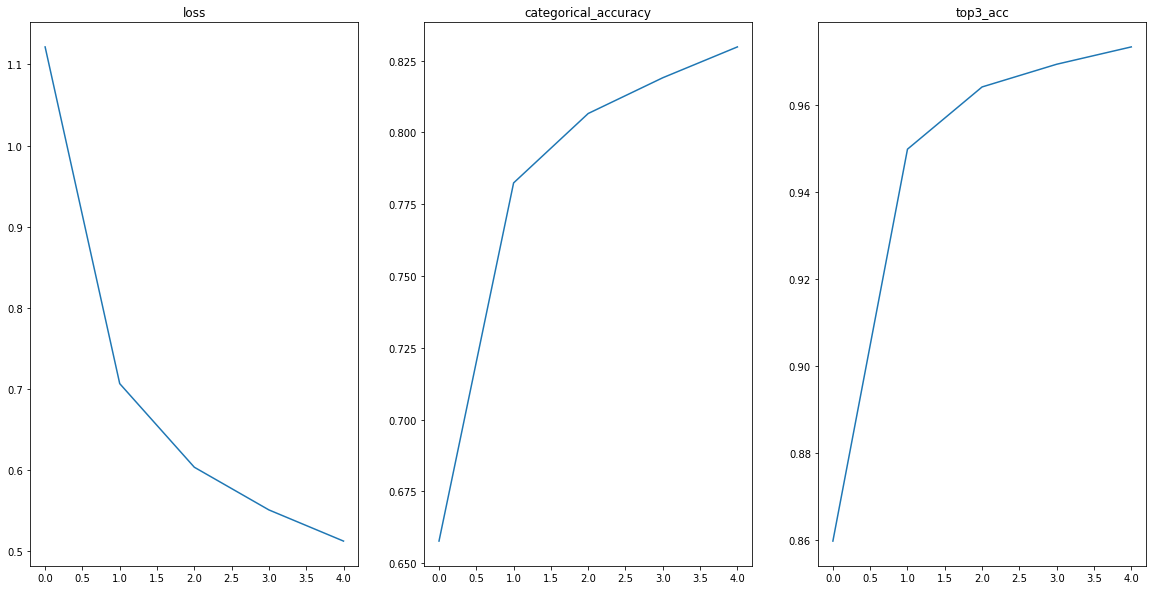

In [4]:
plt.figure(figsize=(20,10))

for i, (name, values) in enumerate(history.history.items()):
    plt.subplot(1, len(history.history.items()), i+1)
    plt.plot(values)
    plt.title(name)

In [7]:
from utils.validation import validation_report
validation_report(test_data=X_test,
                 test_label=y_test,
                 model=model,
                 names=Labels)

Accuracy: 
0.8392



Confusion matrix: 
[[803   4  12  34   1   3 142   0   3   0]
 [  0 951   1  10   1   2   1   1   1   0]
 [ 15   7 706  12  90   7  93   0  13   0]
 [ 33  27  10 854  32   2  37   0   7   0]
 [  7   8 154  34 787   0 106   0   4   0]
 [  4   0   3   2   1 897   2  29   8  14]
 [122   2 106  51  82   0 598   0  21   0]
 [  1   0   1   0   0  50   0 920   5  45]
 [ 15   1   7   3   6   3  21   1 936   1]
 [  0   0   0   0   0  36   0  49   2 940]]



             precision    recall  f1-score   support

T-shirt/top       0.80      0.80      0.80      1002
    Trouser       0.95      0.98      0.97       968
   Pullover       0.71      0.75      0.73       943
      Dress       0.85      0.85      0.85      1002
       Coat       0.79      0.72      0.75      1100
     Sandal       0.90      0.93      0.92       960
      Shirt       0.60      0.61      0.60       982
    Sneaker       0.92      0.90      0.91      1022
        Bag       0.94      0.94      0.94      

### Conclusion

* Is batchNorm efficient?